### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Preview the data
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


### Step 2: Basic Info & Null Value Check

🧾 Dataset shape: (7728394, 46)

📋 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chil

C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\962358140.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values[:15], y=missing.index[:15], palette='Reds_r')


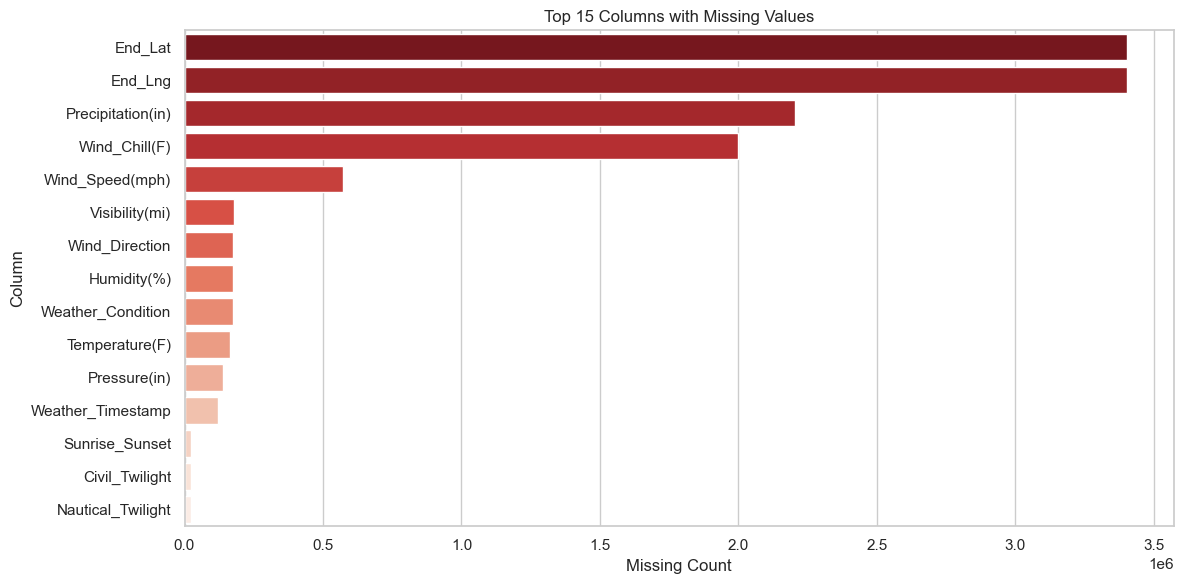

In [2]:
# Shape of the dataset
print("🧾 Dataset shape:", df.shape)

# Data types and memory usage
print("\n📋 Data Info:")
df.info()

# Count missing values
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Visualize top columns with missing values
plt.figure(figsize=(12,6))
sns.barplot(x=missing.values[:15], y=missing.index[:15], palette='Reds_r')
plt.title("Top 15 Columns with Missing Values")
plt.xlabel("Missing Count")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


### Step 3: Explore Severity Distribution

C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\506162543.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette='coolwarm')
C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\506162543.py:9: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


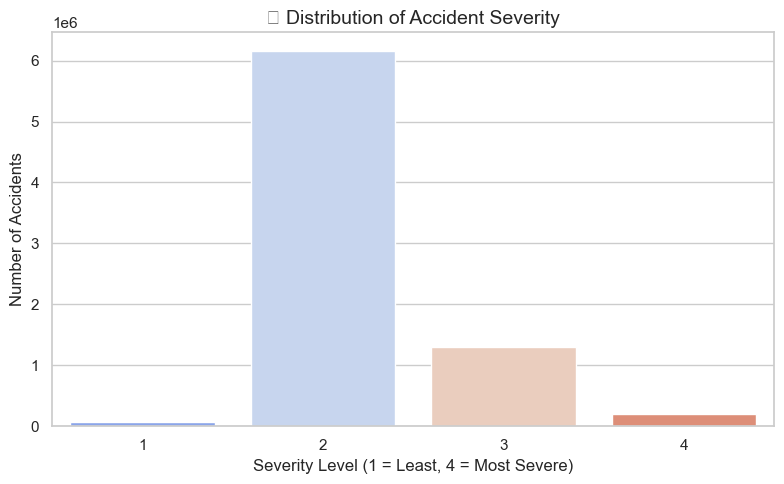


🔢 Severity Percentage Breakdown (%):
Severity
1     0.87
2    79.67
3    16.81
4     2.65
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Severity', palette='coolwarm')

plt.title("🚦 Distribution of Accident Severity", fontsize=14)
plt.xlabel("Severity Level (1 = Least, 4 = Most Severe)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# Show percentages
severity_pct = df['Severity'].value_counts(normalize=True) * 100
print("\n🔢 Severity Percentage Breakdown (%):")
print(severity_pct.sort_index().round(2))


### Step 4: Accidents by State

C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\1871571681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='rocket')
C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\1871571681.py:11: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gokul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


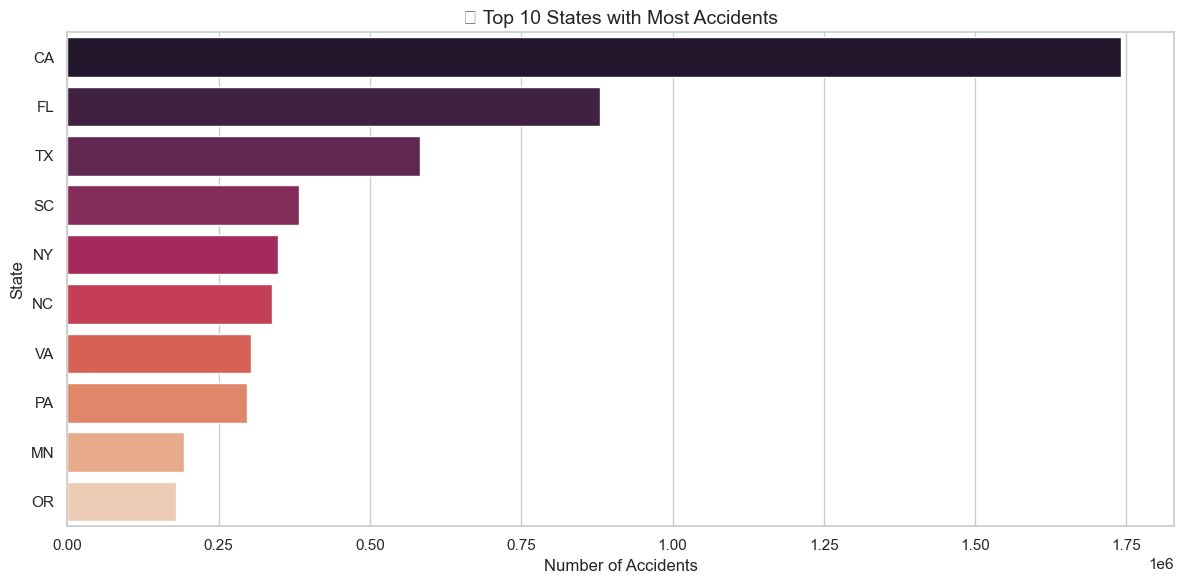


Top 10 States by Total Accidents:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().head(10)

sns.barplot(x=top_states.values, y=top_states.index, palette='rocket')

plt.title("📍 Top 10 States with Most Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Optional: Show counts
print("\nTop 10 States by Total Accidents:")
print(top_states)


### Step 5: Accidents by Hour of the Day (Fixed)

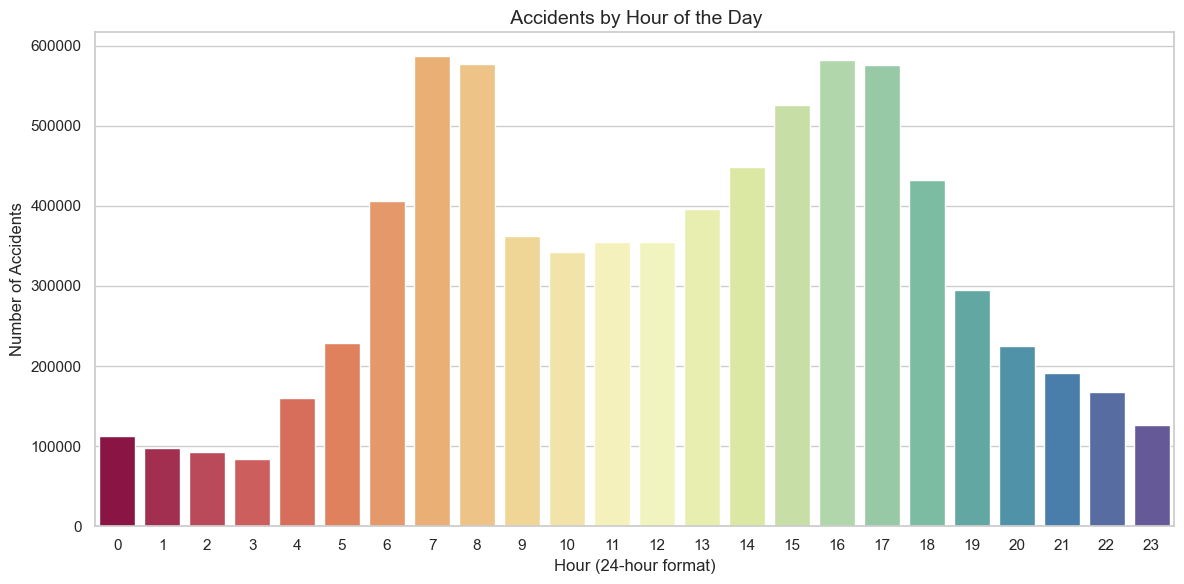

In [7]:
# Parse timestamp with flexible format
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Drop rows where parsing failed
df = df.dropna(subset=['Start_Time'])

# Extract hour
df['Hour'] = df['Start_Time'].dt.hour

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, hue='Hour', legend=False, palette='Spectral')


plt.title(" Accidents by Hour of the Day", fontsize=14)
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()



### Step 6: Accidents by Weather Condition

C:\Users\gokul\AppData\Local\Temp\ipykernel_18672\1676146292.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_d')


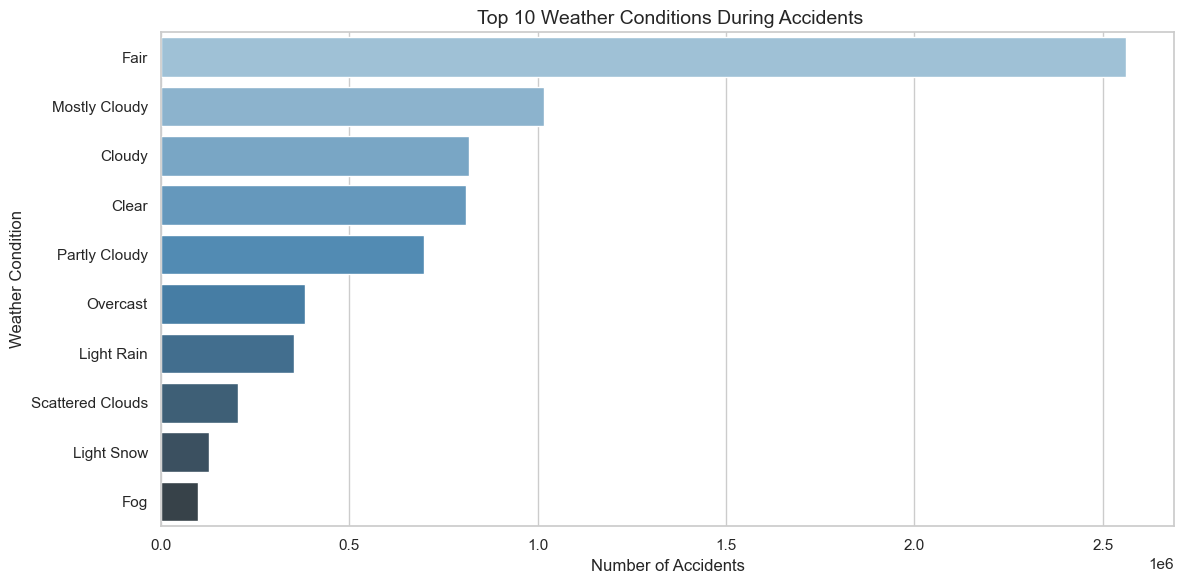

Top 10 Weather Conditions:
 Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


In [9]:
# Drop missing weather condition entries
df_weather = df.dropna(subset=['Weather_Condition'])

# Get top 10 weather conditions
top_weather = df_weather['Weather_Condition'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_d')

plt.title(" Top 10 Weather Conditions During Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# Optional: show counts
print("Top 10 Weather Conditions:\n", top_weather)


# Step 7: Summary of Key Insights

 **Traffic Accident EDA Summary – US Accidents Dataset (March 2023)**

1. 🚦 **Severity Distribution**:
   - Majority of accidents are Severity **2** (79.67%)
   - Severe crashes (Level 4) make up only **2.65%**

2. 📍 **Most Accident-Prone States**:
   - **California (CA)** has the highest number of accidents (1.74M)
   - Followed by **Florida, Texas, South Carolina, and New York**

3. 🕒 **Accidents by Hour**:
   - Two major peaks: **Morning (7–9 AM)** and **Evening (4–6 PM)** rush hours
   - Lowest accident volume occurs between **2–5 AM**

4. 🌧️ **Weather Impact**:
   - Most accidents happen during **Fair / Clear** weather (high exposure time)
   - Still, dangerous conditions like **Rain, Fog, and Snow** contribute significantly (100K+ incidents)

5. 📈 **Data Size**:
   - Analyzed over **7.7 million accident records** across **46 features**

